In [1]:
import numpy as np
import scipy
from scipy import signal
import struct
import matplotlib.pyplot as plt
import librosa
from signal_processor import SignalProcessor
from data_loader.data_loader import DataLoader
from beamforming.beamformer import beamformer
import pandas as pd
#%matplotlib tk

In [6]:
# system prameters
Fs = 16000.
Channels = 2
Hop = 80
Wlen = 128
Nfft = 1*Wlen

audioDataPath = "./audio_data/pcm_record_data_AS_0.bin"

binData = open(audioDataPath, 'rb').read()

dataParse = DataLoader(Wlen*4, Hop*4, data_packed=True, 
                       audio_channels=2, channel_swap=False)
signalChain = SignalProcessor(Fs, Hop, Wlen, Nfft, anal_window="hann", 
                              synth_window="hann")

#loading beamformer from external .csv file
maxsnr_bformer = beamformer()
maxsnr_bformer.load(load_path='./beamforming/weights/weights_2cm_AWE.csv')
#mvdr_bformer = beamformer()
#mvdr_bformer.load(load_path='./beamforming/weights/weights_2cm_MVDR_T180.csv')

left_wav_data, right_wav_data = dataParse.pcm_data_to_wav_float(binData) 

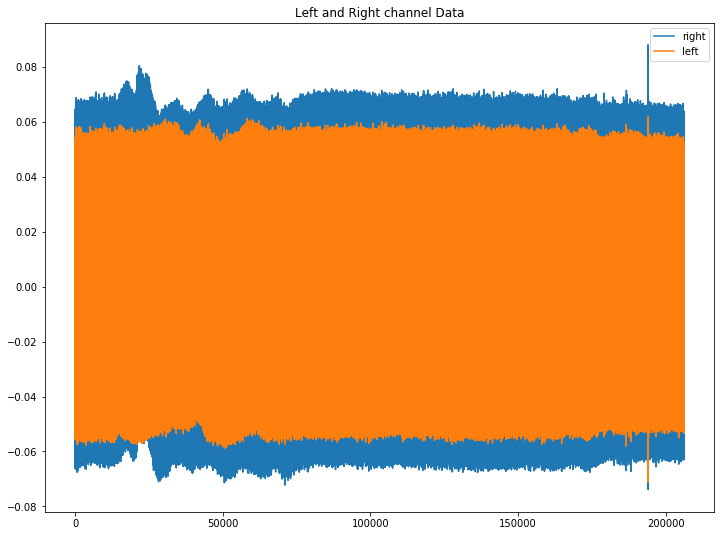

In [7]:
fig = plt.figure(figsize=(12,9))
plt.plot(right_wav_data, label='right')
plt.plot(left_wav_data, label='left')
plt.legend()
plt.title('Left and Right channel Data')
plt.show()


In [8]:
#run with maxsnr beamformer

left_stft, freq, time = signalChain.stft(left_wav_data)

right_stft, freq, time =signalChain.stft(right_wav_data)

left_beam_stft = np.zeros(shape=np.shape(left_stft), dtype=complex).T
right_beam_stft = np.zeros(shape=np.shape(right_stft), dtype=complex).T

for indx in range(np.shape(left_stft)[-1]):
    left_beam_stft[indx] = left_stft.T[indx] * maxsnr_bformer.params[0]
    right_beam_stft[indx] = right_stft.T[indx] * maxsnr_bformer.params[1]

left_stft_filtered = left_beam_stft.T
right_stft_filtered = right_beam_stft.T

Y = left_stft_filtered + right_stft_filtered

audio_formed_maxsnr, t = signalChain.istft(Y)

#run with mvdr beamformer
left_stft, freq, time = signalChain.stft(left_wav_data)

right_stft, freq, time =signalChain.stft(right_wav_data)

left_beam_stft = np.zeros(shape=np.shape(left_stft), dtype=complex).T
right_beam_stft = np.zeros(shape=np.shape(right_stft), dtype=complex).T

for indx in range(np.shape(left_stft)[-1]):
    left_beam_stft[indx] = left_stft.T[indx] * mvdr_bformer.params[0]
    right_beam_stft[indx] = right_stft.T[indx] * mvdr_bformer.params[1]

left_stft_filtered = left_beam_stft.T
right_stft_filtered = right_beam_stft.T

Y = left_stft_filtered + right_stft_filtered

audio_formed_mvdr, t = signalChain.istft(Y)

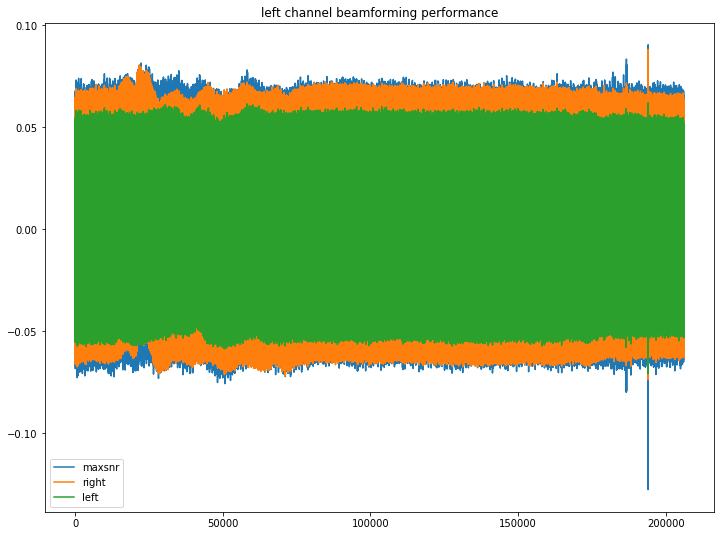

In [9]:
# comparison between maxsnr and mvdr

plt.figure(figsize=(12,9))
plt.plot(audio_formed_maxsnr, label='maxsnr')
plt.plot(right_wav_data, label='right')

#plt.plot(audio_formed_mvdr, label='mvdr')
plt.plot(left_wav_data, label='left')

plt.legend()
plt.title('left channel beamforming performance')
plt.show()

In [18]:
import hashlib
from tensorflow.python.util import compat
import os.path

baseNameList = list(os.path.basename('/Users/axel/KWS/audio/experiment/alexa/vohvdswc_1.wav'))

insertPos = baseNameList.index('_')

baseNameList.insert(insertPos, '_nohash') 

newFileName = "".join(baseNameList)

print(newFileName)

vohvdswc_nohash_1.wav
